In [38]:
import sys
sys.path.append('../')
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from dft_descriptors.prepocessing import preprocess
from classic_descriptors.featurisation import one_hot_encoding
from classic_descriptors.featurisation import process_yield
from rdkit import Chem
from sklearn.decomposition import PCA

In [39]:
df_hte = pd.read_csv("BH_HTE_scaled_3.csv")

In [40]:
df_hte = df_hte

In [41]:
L = df_hte.columns.to_list()

In [42]:
L_scope = ['aryl_halide_.C1_NMR_shift',
 'aryl_halide_.C1_electrostatic_charge',
 'aryl_halide_.C2_NMR_shift',
 'aryl_halide_.C2_electrostatic_charge',
 'aryl_halide_.C3_NMR_shift',
 'aryl_halide_.C3_electrostatic_charge',
 'aryl_halide_.C4_NMR_shift',
 'aryl_halide_.C4_electrostatic_charge',
 'aryl_halide_.H2_NMR_shift',
 'aryl_halide_.H2_electrostatic_charge',
 'aryl_halide_.H3_NMR_shift',
 'aryl_halide_.H3_electrostatic_charge',
 'aryl_halide_E_HOMO',
 'aryl_halide_E_LUMO',
 'aryl_halide_V1_frequency',
 'aryl_halide_V1_intensity',
 'aryl_halide_V2_frequency',
 'aryl_halide_V2_intensity',
 'aryl_halide_V3_frequency',
 'aryl_halide_V3_intensity',
 'aryl_halide_dipole_moment',
 'aryl_halide_electronegativity',
 'aryl_halide_hardness',
 'aryl_halide_molecular_volume',
 'aryl_halide_molecular_weight',
 'aryl_halide_ovality',
 'aryl_halide_surface_area']

In [43]:
L_scope_reduced = [
 'aryl_halide_.C3_NMR_shift',
 'aryl_halide_.H2_electrostatic_charge',
 'aryl_halide_V2_frequency']

In [44]:
L_opt = ['base_.N1_electrostatic_charge',
 'base_E_HOMO',
 'base_E_LUMO',
 'base_dipole_moment',
 'base_electronegativity',
 'base_hardness',
 'base_molecular_volume',
 'base_molecular_weight',
 'base_ovality',
 'base_surface_area',
 'ligand_.C10_NMR_shift',
 'ligand_.C10_electrostatic_charge',
 'ligand_.C11_NMR_shift',
 'ligand_.C11_electrostatic_charge',
 'ligand_.C12_NMR_shift',
 'ligand_.C12_electrostatic_charge',
 'ligand_.C13_NMR_shift',
 'ligand_.C13_electrostatic_charge',
 'ligand_.C14_NMR_shift',
 'ligand_.C14_electrostatic_charge',
 'ligand_.C15_NMR_shift',
 'ligand_.C15_electrostatic_charge',
 'ligand_.C16_NMR_shift',
 'ligand_.C16_electrostatic_charge',
 'ligand_.C17_NMR_shift',
 'ligand_.C17_electrostatic_charge',
 'ligand_.C1_NMR_shift',
 'ligand_.C1_electrostatic_charge',
 'ligand_.C2_NMR_shift',
 'ligand_.C2_electrostatic_charge',
 'ligand_.C3_NMR_shift',
 'ligand_.C3_electrostatic_charge',
 'ligand_.C4_NMR_shift',
 'ligand_.C4_electrostatic_charge',
 'ligand_.C5_NMR_shift',
 'ligand_.C5_electrostatic_charge',
 'ligand_.C6_NMR_shift',
 'ligand_.C6_electrostatic_charge',
 'ligand_.C7_NMR_shift',
 'ligand_.C7_electrostatic_charge',
 'ligand_.C8_NMR_shift',
 'ligand_.C8_electrostatic_charge',
 'ligand_.C9_NMR_shift',
 'ligand_.C9_electrostatic_charge',
 'ligand_.H11_NMR_shift',
 'ligand_.H11_electrostatic_charge',
 'ligand_.H3_NMR_shift',
 'ligand_.H3_electrostatic_charge',
 'ligand_.H4_NMR_shift',
 'ligand_.H4_electrostatic_charge',
 'ligand_.H9_NMR_shift',
 'ligand_.H9_electrostatic_charge',
 'ligand_.P1_electrostatic_charge',
 'ligand_V10_frequency',
 'ligand_V10_intensity',
 'ligand_V1_frequency',
 'ligand_V1_intensity',
 'ligand_V2_frequency',
 'ligand_V2_intensity',
 'ligand_V3_frequency',
 'ligand_V3_intensity',
 'ligand_V4_frequency',
 'ligand_V4_intensity',
 'ligand_V5_frequency',
 'ligand_V5_intensity',
 'ligand_V6_frequency',
 'ligand_V6_intensity',
 'ligand_V7_frequency',
 'ligand_V7_intensity',
 'ligand_V8_frequency',
 'ligand_V8_intensity',
 'ligand_V9_frequency',
 'ligand_V9_intensity',
 'ligand_dipole_moment',
 'additive_.C3_NMR_shift',
 'additive_.C3_electrostatic_charge',
 'additive_.C4_NMR_shift',
 'additive_.C4_electrostatic_charge',
 'additive_.C5_NMR_shift',
 'additive_.C5_electrostatic_charge',
 'additive_.N1_electrostatic_charge',
 'additive_.O1_electrostatic_charge',
 'additive_E_HOMO',
 'additive_E_LUMO',
 'additive_V1_frequency',
 'additive_V1_intensity',
 'additive_dipole_moment',
 'additive_electronegativity',
 'additive_hardness',
 'additive_molecular_volume',
 'additive_molecular_weight',
 'additive_ovality',
 'additive_surface_area']

In [45]:
L_opt_reduced = ['additive_.C3_NMR_shift',
         'additive_E_LUMO',
         'additive_.O1_electrostatic_charge',
         'additive_.C5_electrostatic_charge',
         'additive_dipole_moment',
         'additive_molecular_volume',
         'base_electronegativity',
         'additive_E_HOMO',
         'additive_V1_intensity',
         'additive_.C4_NMR_shift',
         'additive_V1_frequency',
         'additive_surface_area',
         'additive_.C4_electrostatic_charge',
         'additive_.C3_electrostatic_charge',
         'additive_.N1_electrostatic_charge',
         'base_.N1_electrostatic_charge',
         'base_E_HOMO',
         'base_molecular_weight',
         'additive_ovality',
         'additive_hardness',
         'base_dipole_moment',
         'base_molecular_volume',
         'base_E_LUMO',
]

In [46]:
df_hte_sco = df_hte[L_scope]
df_hte_opt = df_hte[L_opt]
X_sco = df_hte_sco.values
X_opt = df_hte_opt.values

In [47]:
X_sco = df_hte_sco.values
X_opt = df_hte_opt.values

In [48]:
print(X_sco.shape)
print(len(L_scope))
print(X_opt.shape)
print(len(L_opt))

(3960, 27)
27
(3960, 93)
93


In [49]:
pca = PCA(n_components=10)
pca2 = PCA(n_components=10)
pca.fit(X_sco)
X_sco_pc1 = pca.transform(X_sco)
sco_pc1 = np.array([i[0] for i in X_sco_pc1])

pca2.fit(X_opt)
X_opt_pc1 = pca2.transform(X_opt)
opt_pc1 = np.array([i[0] for i in X_opt_pc1])

In [50]:
data_hte = pd.DataFrame(data=opt_pc1.reshape(-1,1), columns=["opt"])
data_hte["sco"] = sco_pc1.reshape(-1,1)
data_hte["yield"] = df_hte["yield"]
print(data_hte.values.shape)

(3960, 3)


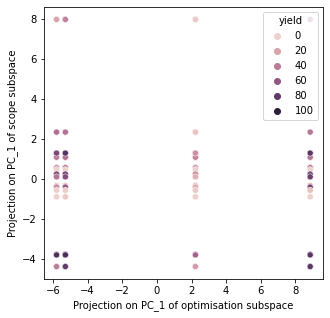

In [51]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='opt', y='sco', hue='yield', data=data_hte, legend=True)

plt.xlabel("Projection on PC_1 of optimisation subspace")
plt.ylabel("Projection on PC_1 of scope subspace")
plt.savefig('dataset_hte_pc_opt_sco.svg', dpi=300, format='svg',
        bbox_inches='tight' )
plt.show()

# FIGURE PUBLI 

In [52]:
from dft_descriptors.featurisation import process_dataframe_dft
df = pd.read_csv("../data_csv/Data_test11262021.csv")
df_lit = preprocess(df)
def AL_preprocess(df):
    df["Lewis Acid"] = df["Lewis Acid"].fillna('NoLewisAcid')
    df["Lewis Acid"] = df["Lewis Acid"].replace('nan', 'NoLewisAcid')
    Lewis_Acids_to_drop = ['O=C(O[Cs])O[Cs]', 'Cl[Cs]', 
                       'O=S(=O)(O[Sc](OS(=O)(=O)C(F)(F)F)OS(=O)(=O)C(F)(F)F)C(F)(F)F', 
                       'F[Cs]', 'O=P(O[Na])(O[Na])O[Na]', '[Rb+]',
                       'CC(C)(C)C(=O)O[Cs]', '[Cs+]', 'CC(=O)O[Cu]OC(C)=O', 'F[Sr]F']
    for al in Lewis_Acids_to_drop:
        df = df[df["Lewis Acid"] != al]
    
    return df.reset_index(drop=True)
df_lit = AL_preprocess(df_lit)
X, y, DOIs, Mecas, Origin, (v_scope, v_optim) = process_dataframe_dft(df_lit, dim=True)
scope = np.array(v_scope)
optim = np.array(v_optim)
df_lit["proj_scope"] = [np.dot(x, scope) for x in X ]
df_lit["proj_optimisation"] = [np.dot(x, optim) for x in X ]
df_lit["yield"] = y
df_lit["data type"] = Origin

NoLigand


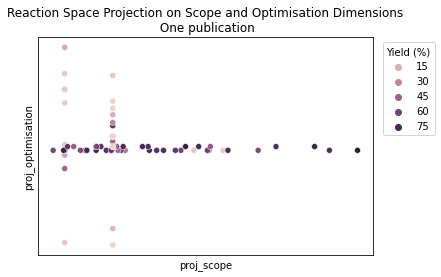

In [53]:
doi_num = 4
dois = df_lit["DOI"].unique()
data_doi = df_lit[df_lit["DOI"] == dois[doi_num]]
sns.scatterplot(data=data_doi, x='proj_scope', y='proj_optimisation', hue='yield')
plt.title("Reaction Space Projection on Scope and Optimisation Dimensions\n One publication")
plt.legend(title="Yield (%)", bbox_to_anchor=(1.2, 1))
plt.xticks([])
plt.yticks([])
plt.savefig("doi_4_projection_opt_scope.png", dpi=300, bbox_inches ='tight')

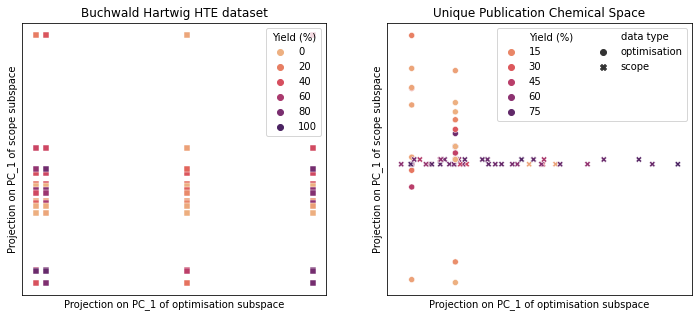

In [54]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))

sns.scatterplot(x='opt', y='sco', hue='yield', data=data_hte, marker="s",
                legend="auto", ax = ax[0], palette='flare')

ax[0].set_title("Buchwald Hartwig HTE dataset")
ax[0].legend(title="Yield (%)", loc = 'upper right')
ax[0].set_xlabel("Projection on PC_1 of optimisation subspace")
ax[0].set_ylabel("Projection on PC_1 of scope subspace")
ax[0].set_xticks([])
ax[0].set_yticks([])
handles0 = ax[0].get_legend_handles_labels()

sns.scatterplot(data=data_doi, x='proj_scope', y='proj_optimisation', 
                hue='yield', ax = ax[1], style="data type", legend="auto",
                palette='flare')
ax[1].set_title("Unique Publication Chemical Space")
ax[1].set_xlabel("Projection on PC_1 of optimisation subspace")
ax[1].set_ylabel("Projection on PC_1 of scope subspace")
ax[1].set_xticks([])
ax[1].set_yticks([])

handles = ax[1].get_legend_handles_labels()
h0 = handles[0] 
h0.append(handles[0][0])
h0.append(handles[0][0])
h1 = ['Yield (%)', '15', '30', '45', '60', '75', 'data type', 'optimisation', 'scope', '', '']
ax[1].get_legend().remove()
#ax[1].legend(handles, ncol=2)
ax[1].legend(h0, h1, ncol=2, loc='upper right')

plt.savefig('nicolit_hte_pc_opt_sco.svg', dpi=300, format='svg',
        bbox_inches='tight' )

In [55]:
# PCA on reduced parameters :
# cf fig 23 Ahenman SI

df_hte_sco = df_hte[L_scope_reduced]
df_hte_opt = df_hte[L_opt_reduced]
X_sco = df_hte_sco.values
X_opt = df_hte_opt.values
print(X_opt.shape)
print(X_sco.shape)
pca = PCA(n_components=1)
pca2 = PCA(n_components=10)
pca.fit(X_sco)
X_sco_pc1 = pca.transform(X_sco)
sco_pc1 = np.array([i[0] for i in X_sco_pc1])

pca2.fit(X_opt)
X_opt_pc1 = pca2.transform(X_opt)
opt_pc1 = np.array([i[1] for i in X_opt_pc1])

data_hte = pd.DataFrame(data=opt_pc1.reshape(-1,1), columns=["opt"])
data_hte["sco"] = sco_pc1.reshape(-1,1)
data_hte["yield"] = df_hte["yield"]

(3960, 23)
(3960, 3)


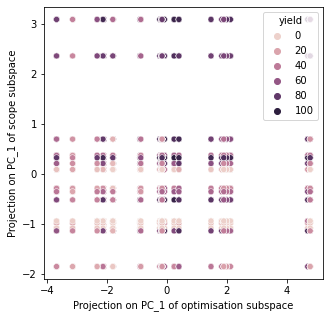

In [56]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='opt', y='sco', hue='yield', data=data_hte, legend=True)

plt.xlabel("Projection on PC_1 of optimisation subspace")
plt.ylabel("Projection on PC_1 of scope subspace")
#plt.savefig('dataset_hte_pc_opt_sco.svg', dpi=300, format='svg',
#        bbox_inches='tight' )
plt.show()

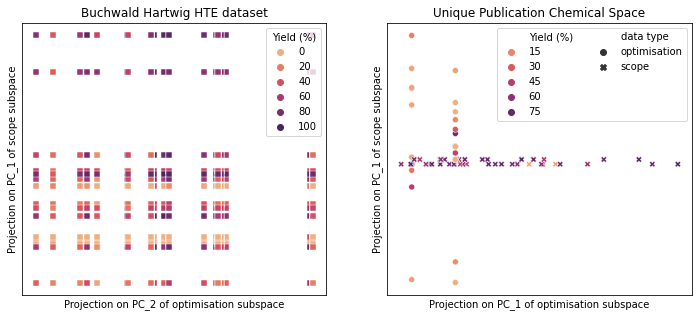

In [57]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))

sns.scatterplot(x='opt', y='sco', hue='yield', data=data_hte, marker="s",
                legend="auto", ax = ax[0], palette='flare')

ax[0].set_title("Buchwald Hartwig HTE dataset")
ax[0].legend(title="Yield (%)", loc = 'upper right')
ax[0].set_xlabel("Projection on PC_2 of optimisation subspace")
ax[0].set_ylabel("Projection on PC_1 of scope subspace")
ax[0].set_xticks([])
ax[0].set_yticks([])
handles0 = ax[0].get_legend_handles_labels()

sns.scatterplot(data=data_doi, x='proj_scope', y='proj_optimisation', 
                hue='yield', ax = ax[1], style="data type", legend="auto",
                palette='flare')
ax[1].set_title("Unique Publication Chemical Space")
ax[1].set_xlabel("Projection on PC_1 of optimisation subspace")
ax[1].set_ylabel("Projection on PC_1 of scope subspace")
ax[1].set_xticks([])
ax[1].set_yticks([])

handles = ax[1].get_legend_handles_labels()
h0 = handles[0] 
h0.append(handles[0][0])
h0.append(handles[0][0])
h1 = ['Yield (%)', '15', '30', '45', '60', '75', 'data type', 'optimisation', 'scope', '', '']
ax[1].get_legend().remove()
#ax[1].legend(handles, ncol=2)
ax[1].legend(h0, h1, ncol=2, loc='upper right')

plt.savefig('nicolit_hte_pc_opt_sco2.svg', dpi=300, format='svg',
        bbox_inches='tight' )